# PART 1

## Importing all necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading .CSV file

In [2]:
airbnb = pd.read_csv('airbnb prices.csv')
airbnb.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


## Finding out Room types

In [3]:
airbnb.room_type.value_counts()

Entire home/apt    14978
Private room        3682
Shared room           63
Name: room_type, dtype: int64

## Dropping Shared Rooms as the count is very low

In [4]:
airbnb = airbnb.loc[airbnb['room_type'] != 'Shared room']
airbnb.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
33,10201214,1476,8497487,Entire home/apt,NaN,Amsterdam,NaN,Ijburg / Eiland Zeeburg,19,5.0,8,4.0,NaN,763.0,NaN,Beautiful Watervilla in Amsterdam,2017-07-23 13:02:10.468528,52.348254,5.001477,0101000020E6100000E7C8CA2F83011440C0594A96932C...
34,3119298,1476,15847782,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,1,0.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...
35,5372074,1476,14390964,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,10,5.0,4,3.0,NaN,721.0,NaN,Prinsengracht Appartement,2017-07-23 12:52:40.980471,52.373078,4.884269,0101000020E61000006C770FD07D891340B56D1805C12F...
36,10511291,1476,5421078,Entire home/apt,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,8,3.0,NaN,1412.0,NaN,Whole house 200m2 Frankendael Park,2017-07-23 12:30:42.249974,52.350968,4.929821,0101000020E61000003B8908FF22B81340A5F8F884EC2C...
37,18047871,1476,9302267,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,0,0.0,4,4.0,NaN,541.0,NaN,Great 4 bedroom apartment at the flower market,2017-07-23 12:30:27.637777,52.367890,4.889273,0101000020E6100000FDDCD0949D8E13404243FF04172F...


## Finding out the popularity of neighborhood by count

In [5]:
airbnb.neighborhood.value_counts()

De Baarsjes / Oud West                    3280
De Pijp / Rivierenbuurt                   2371
Centrum West                              2217
Centrum Oost                              1724
Westerpark                                1424
Noord-West / Noord-Midden                 1416
Oud Oost                                  1167
Bos en Lommer                              985
Oostelijk Havengebied / Indische Buurt     916
Watergraafsmeer                            515
Oud Noord                                  492
Ijburg / Eiland Zeeburg                    378
Slotervaart                                346
Buitenveldert / Zuidas                     248
Noord West                                 241
Noord Oost                                 221
Geuzenveld / Slotermeer                    192
Osdorp                                     161
De Aker / Nieuw Sloten                     114
Bijlmer Centrum                             98
Bijlmer Oost                                97
Gaasperdam / 

#### Exploring the count of reviews which has 1 or 0 reviews

In [6]:
airbnb[(airbnb['reviews'] == 0)|(airbnb['reviews'] == 1)].reviews.value_counts()

0    2975
1    1500
Name: reviews, dtype: int64

### Finding count of each satisfaction rate

In [7]:
airbnb.overall_satisfaction.value_counts()

5.0    7697
0.0    5721
4.5    4543
4.0     573
3.5     105
3.0      19
2.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

## Creating a Sub dataset for 0 level of satisfaction

In [8]:
airbnb0 = airbnb.loc[airbnb['overall_satisfaction'] == 0.0]
airbnb0.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
34,3119298,1476,15847782,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,1,0.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...
36,10511291,1476,5421078,Entire home/apt,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,8,3.0,NaN,1412.0,NaN,Whole house 200m2 Frankendael Park,2017-07-23 12:30:42.249974,52.350968,4.929821,0101000020E61000003B8908FF22B81340A5F8F884EC2C...
37,18047871,1476,9302267,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,0,0.0,4,4.0,NaN,541.0,NaN,Great 4 bedroom apartment at the flower market,2017-07-23 12:30:27.637777,52.367890,4.889273,0101000020E6100000FDDCD0949D8E13404243FF04172F...
38,7468232,1476,7215538,Entire home/apt,NaN,Amsterdam,NaN,Noord-West / Noord-Midden,2,0.0,4,2.0,NaN,594.0,NaN,MuseumSquare apartment with garden,2017-07-23 12:30:27.627216,52.355169,4.883219,0101000020E6100000C4D2C08F6A881340C9C6832D762D...
40,5818567,1476,29561840,Entire home/apt,NaN,Amsterdam,NaN,De Aker / Nieuw Sloten,0,0.0,4,2.0,NaN,361.0,NaN,"Luxurous, modern, bright appartment",2017-07-23 12:29:20.728096,52.346007,4.811830,0101000020E61000008FA50F5D503F1340F29716F5492C...


### Decribing the Dataset

In [9]:
airbnb.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,1.866000e+04,18660.0,1.866000e+04,0.0,0.0,18660.000000,18660.000000,18660.000000,18660.000000,0.0,18660.000000,0.0,18660.000000,18660.000000
mean,1.120262e+07,1476.0,3.575860e+07,NaN,NaN,16.729207,3.303778,2.921543,1.431833,NaN,166.811897,NaN,52.365261,4.888606
std,6.084245e+06,0.0,3.758082e+07,NaN,NaN,33.506653,2.213003,1.319141,0.880145,NaN,108.961385,NaN,0.015141,0.034530
min,2.818000e+03,1476.0,2.234000e+03,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,12.000000,NaN,52.296200,4.763264
25%,6.047014e+06,1476.0,7.125411e+06,NaN,NaN,2.000000,0.000000,2.000000,1.000000,NaN,108.000000,NaN,52.355252,4.864372
50%,1.228306e+07,1476.0,1.987107e+07,NaN,NaN,6.000000,4.500000,2.000000,1.000000,NaN,144.000000,NaN,52.364623,4.885995
75%,1.661017e+07,1476.0,5.201818e+07,NaN,NaN,17.000000,5.000000,4.000000,2.000000,NaN,192.000000,NaN,52.374789,4.907502
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,532.000000,5.000000,17.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.027689


### Satisfaction Rating Count where Rating is 3 and 2

In [10]:
airbnb_bedrooms3 = airbnb[(airbnb['bedrooms'] == 3.0)]
airbnb_bedrooms3.overall_satisfaction.value_counts()

0.0    635
5.0    515
4.5    266
4.0     22
3.5      5
2.5      1
Name: overall_satisfaction, dtype: int64

In [11]:
airbnb_bedrooms2 = airbnb[(airbnb['bedrooms'] == 2.0)]
airbnb_bedrooms2.overall_satisfaction.value_counts()

5.0    1787
0.0    1487
4.5    1033
4.0     127
3.5      16
3.0       6
Name: overall_satisfaction, dtype: int64

### Satisfaction Rating Count where price falls between 150 to 180 (both incl)

In [12]:
airbnb_price = airbnb[(airbnb['price'] >= 150) & (airbnb['price'] <= 180)]
airbnb_price.overall_satisfaction.value_counts()

5.0    1634
0.0    1169
4.5     881
4.0     104
3.5      12
3.0       4
Name: overall_satisfaction, dtype: int64

### Copying the dataset and imputing the value 4 whenever the satisfaction count is 0

In [13]:
airbnb_copy = airbnb.copy()

In [14]:
airbnb_copy['overall_satisfaction'] = airbnb_copy['overall_satisfaction'].replace([0.0],4.0)
airbnb_copy.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
33,10201214,1476,8497487,Entire home/apt,NaN,Amsterdam,NaN,Ijburg / Eiland Zeeburg,19,5.0,8,4.0,NaN,763.0,NaN,Beautiful Watervilla in Amsterdam,2017-07-23 13:02:10.468528,52.348254,5.001477,0101000020E6100000E7C8CA2F83011440C0594A96932C...
34,3119298,1476,15847782,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,1,4.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...
35,5372074,1476,14390964,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,10,5.0,4,3.0,NaN,721.0,NaN,Prinsengracht Appartement,2017-07-23 12:52:40.980471,52.373078,4.884269,0101000020E61000006C770FD07D891340B56D1805C12F...
36,10511291,1476,5421078,Entire home/apt,NaN,Amsterdam,NaN,Watergraafsmeer,1,4.0,8,3.0,NaN,1412.0,NaN,Whole house 200m2 Frankendael Park,2017-07-23 12:30:42.249974,52.350968,4.929821,0101000020E61000003B8908FF22B81340A5F8F884EC2C...
37,18047871,1476,9302267,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,0,4.0,4,4.0,NaN,541.0,NaN,Great 4 bedroom apartment at the flower market,2017-07-23 12:30:27.637777,52.367890,4.889273,0101000020E6100000FDDCD0949D8E13404243FF04172F...


### Counting satiafaction rating then comparing with main dataset

In [15]:
airbnb_copy.overall_satisfaction.value_counts()

5.0    7697
4.0    6294
4.5    4543
3.5     105
3.0      19
1.0       1
2.5       1
Name: overall_satisfaction, dtype: int64

In [16]:
airbnb.overall_satisfaction.value_counts()

5.0    7697
0.0    5721
4.5    4543
4.0     573
3.5     105
3.0      19
2.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

### Finding count of each accomodation value to understand where is the most availability

In [17]:
airbnb.accommodates.value_counts()

2     9996
4     5563
3     1583
6      475
5      470
1      355
8      105
7       52
16      18
10      16
12       9
9        8
14       6
11       2
13       1
17       1
Name: accommodates, dtype: int64

### Dropping the values where bedrooms are 0

In [18]:
airbnb = airbnb.loc[airbnb['bedrooms'] != 0]
airbnb.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
33,10201214,1476,8497487,Entire home/apt,NaN,Amsterdam,NaN,Ijburg / Eiland Zeeburg,19,5.0,8,4.0,NaN,763.0,NaN,Beautiful Watervilla in Amsterdam,2017-07-23 13:02:10.468528,52.348254,5.001477,0101000020E6100000E7C8CA2F83011440C0594A96932C...
34,3119298,1476,15847782,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,1,0.0,8,3.0,NaN,445.0,NaN,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...
35,5372074,1476,14390964,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,10,5.0,4,3.0,NaN,721.0,NaN,Prinsengracht Appartement,2017-07-23 12:52:40.980471,52.373078,4.884269,0101000020E61000006C770FD07D891340B56D1805C12F...
36,10511291,1476,5421078,Entire home/apt,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,8,3.0,NaN,1412.0,NaN,Whole house 200m2 Frankendael Park,2017-07-23 12:30:42.249974,52.350968,4.929821,0101000020E61000003B8908FF22B81340A5F8F884EC2C...
37,18047871,1476,9302267,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,0,0.0,4,4.0,NaN,541.0,NaN,Great 4 bedroom apartment at the flower market,2017-07-23 12:30:27.637777,52.367890,4.889273,0101000020E6100000FDDCD0949D8E13404243FF04172F...


In [19]:
airbnb.bedrooms.value_counts()

1.0     11038
2.0      4456
3.0      1444
4.0       473
5.0        62
6.0        19
10.0        5
7.0         4
8.0         3
9.0         2
Name: bedrooms, dtype: int64

### On what price point most properties are available

In [20]:
airbnb.price.value_counts().sort_values(ascending = False)

180.0    961
119.0    948
144.0    819
150.0    583
132.0    549
        ... 
755.0      1
12.0       1
810.0      1
567.0      1
413.0      1
Name: price, Length: 418, dtype: int64

# PART 2

### Display the info of the dataset

In [21]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17506 entries, 33 to 18722
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               17506 non-null  int64  
 1   survey_id             17506 non-null  int64  
 2   host_id               17506 non-null  int64  
 3   room_type             17506 non-null  object 
 4   country               0 non-null      float64
 5   city                  17506 non-null  object 
 6   borough               0 non-null      float64
 7   neighborhood          17506 non-null  object 
 8   reviews               17506 non-null  int64  
 9   overall_satisfaction  17506 non-null  float64
 10  accommodates          17506 non-null  int64  
 11  bedrooms              17506 non-null  float64
 12  bathrooms             0 non-null      float64
 13  price                 17506 non-null  float64
 14  minstay               0 non-null      float64
 15  name              

In [22]:
airbnb.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,1.750600e+04,17506.0,1.750600e+04,0.0,0.0,17506.000000,17506.000000,17506.000000,17506.000000,0.0,17506.000000,0.0,17506.000000,17506.000000
mean,1.108287e+07,1476.0,3.509582e+07,NaN,NaN,16.368959,3.302868,2.960642,1.526220,NaN,169.137267,NaN,52.365207,4.888416
std,6.080450e+06,0.0,3.710345e+07,NaN,NaN,32.796906,2.215583,1.333545,0.825627,NaN,111.009236,NaN,0.015112,0.034722
min,2.818000e+03,1476.0,2.234000e+03,NaN,NaN,0.000000,0.000000,1.000000,1.000000,NaN,12.000000,NaN,52.296200,4.763264
25%,5.923722e+06,1476.0,7.004309e+06,NaN,NaN,2.000000,0.000000,2.000000,1.000000,NaN,113.000000,NaN,52.355178,4.863899
50%,1.210997e+07,1476.0,1.956281e+07,NaN,NaN,6.000000,4.500000,2.000000,1.000000,NaN,144.000000,NaN,52.364507,4.885528
75%,1.643984e+07,1476.0,5.089235e+07,NaN,NaN,17.000000,5.000000,4.000000,2.000000,NaN,196.000000,NaN,52.374604,4.907448
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,532.000000,5.000000,17.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.027689


### Histogram of Reviews where range is 0 to 100

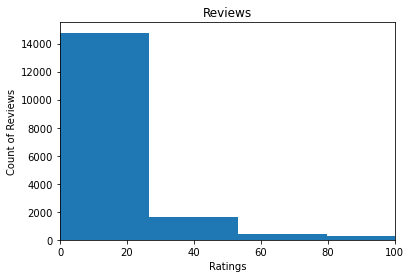

In [57]:
x = airbnb['reviews']
bins = 20
plt.hist(x, bins)

plt.title('Reviews')
plt.xlabel('Ratings')
plt.ylabel('Count of Reviews')
plt.xlim([0,100])

plt.show()

#### Histogram of overall_satisfaction where price is in the range of 100 to 200 both incl.

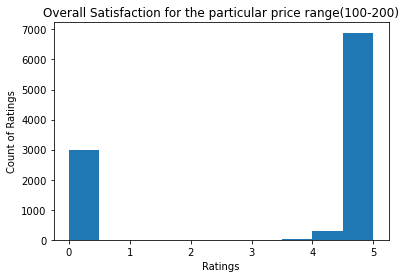

In [58]:
price = airbnb[(airbnb['price'] >= 100) & (airbnb['price']<= 200)]
ratings = price.overall_satisfaction
plt.hist(ratings)
plt.title('Overall Satisfaction for the particular price range(100-200)')
plt.xlabel('Ratings')
plt.ylabel('Count of Ratings')
plt.show()

#### Histogram of overall_satisfaction where price is less than 50

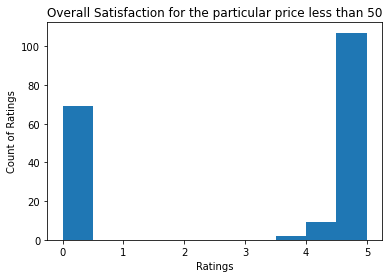

In [60]:
price_50 = airbnb[(airbnb['price'] < 50)]
ratings = price_50.overall_satisfaction
plt.hist(ratings)
plt.title('Overall Satisfaction for the particular price less than 50')
plt.xlabel('Ratings')
plt.ylabel('Count of Ratings')
plt.show()

#### Histogram of Overall Satisfaction where price is greater than 200

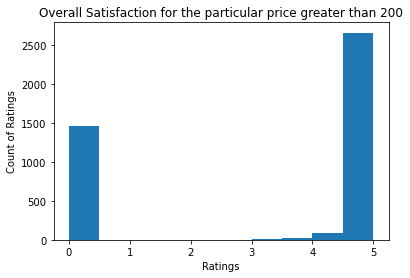

In [62]:
price_200 = airbnb[(airbnb['price'] > 200)]
ratings = price_200.overall_satisfaction
plt.hist(ratings)
plt.title('Overall Satisfaction for the particular price greater than 200')
plt.xlabel('Ratings')
plt.ylabel('Count of Ratings')
plt.show()

#### Histogram of Overall Satisfaction where price is greater than 300

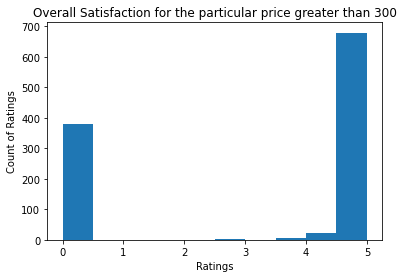

In [63]:
price_300 = airbnb[(airbnb['price'] > 300)]
ratings = price_300.overall_satisfaction
plt.hist(ratings)
plt.title('Overall Satisfaction for the particular price greater than 300')
plt.xlabel('Ratings')
plt.ylabel('Count of Ratings')
plt.show()

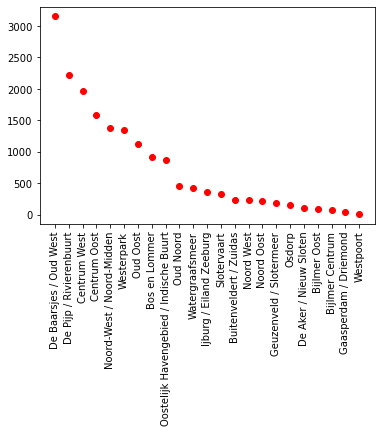

In [71]:
plt.plot(airbnb.neighborhood.value_counts(), 'ro')
plt.xticks(rotation=90)
plt.show()